In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yasmeentrefi","key":"3dbb60d355c607132396c5efb7dde3ae"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yasmeentrefi/traincurrency

100% 3.26G/3.27G [00:59<00:00, 21.1MB/s]
100% 3.27G/3.27G [00:59<00:00, 59.0MB/s]


In [ ]:
!kaggle datasets download -d yasmeentrefi/validationcurency

 98% 759M/778M [00:09<00:00, 79.6MB/s]
100% 778M/778M [00:09<00:00, 88.7MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/traincurrency.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/content/validationcurency.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
dir_100  = os.path.join('/tmp/TrainCurrency/100')
dir_1000 = os.path.join('/tmp/TrainCurrency/1000')
dir_200  = os.path.join('/tmp/TrainCurrency/200')
dir_2000 = os.path.join('/tmp/TrainCurrency/2000')
dir_50   = os.path.join('/tmp/TrainCurrency/50')
dir_500  = os.path.join('/tmp/TrainCurrency/500')
dir_5000  = os.path.join('/tmp/TrainCurrency/5000')

print('total training 100  images:', len(os.listdir(dir_100)))
print('total training 1000 images:', len(os.listdir(dir_1000)))
print('total training 200  images:', len(os.listdir(dir_200)))
print('total training 2000 images:', len(os.listdir(dir_2000)))
print('total training 50   images:', len(os.listdir(dir_50)))
print('total training 500  images:', len(os.listdir(dir_500)))
print('total training 5000 images:', len(os.listdir(dir_5000)))

files_100  = os.listdir(dir_100)
files_1000 = os.listdir(dir_1000)
files_200  = os.listdir(dir_200)
files_2000 = os.listdir(dir_2000)
files_50   = os.listdir(dir_50)
files_500  = os.listdir(dir_500)
files_5000 = os.listdir(dir_5000)

total training 100  images: 250
total training 1000 images: 250
total training 200  images: 250
total training 2000 images: 250
total training 50   images: 250
total training 500  images: 250
total training 5000 images: 250


In [ ]:
#@title
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

TRAINING_DIR = "/tmp/TrainCurrency/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/valCurency"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(500,500),
	class_mode='categorical',
  batch_size=35
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(500,500),
	class_mode='categorical',
  batch_size=35
)

callbacks = myCallback()

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=10,callbacks=[callbacks])

model.save("currency.h5")

Found 1750 images belonging to 7 classes.
Found 350 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 496, 496, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 248, 248, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 244, 244, 64)      102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)        0         
_______________________________________

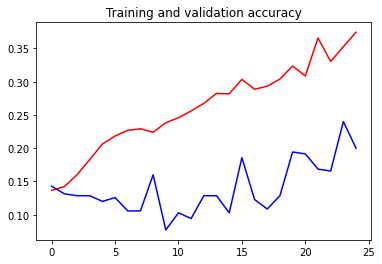

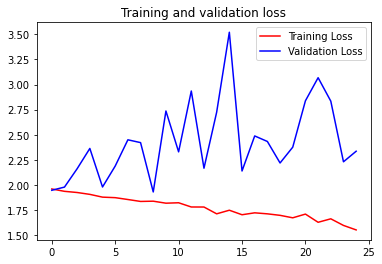

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


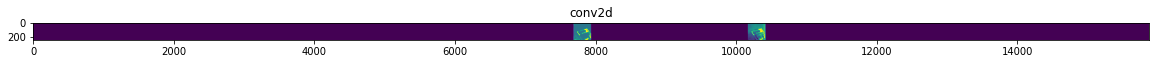

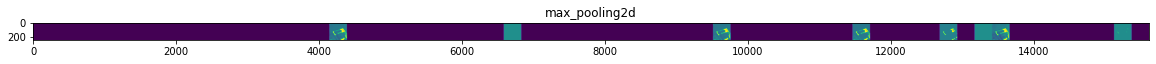

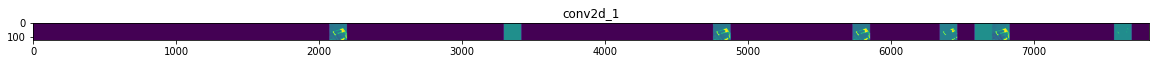

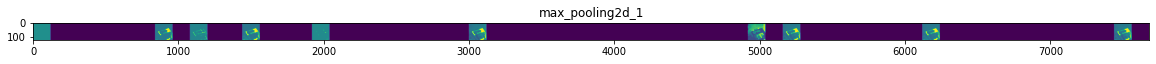

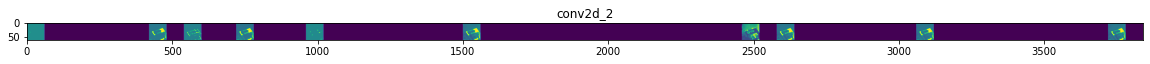

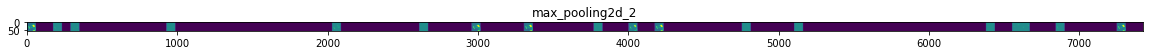

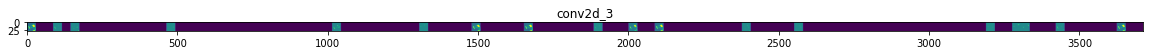

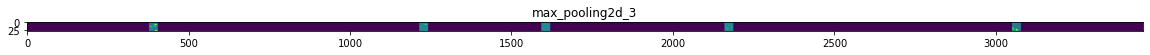

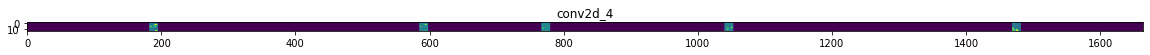

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
img_files_100 = [os.path.join(dir_100, f) for f in files_100]
img_files_1000 = [os.path.join(dir_1000, f) for f in files_1000]

img_path = random.choice(img_files_100 + img_files_1000)
img = load_img(img_path, target_size=(500, 500))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )